# STA130 Homework 08

## https://chatgpt.com/share/673cdb91-0d70-800e-abc1-f6eeb41d0608

## "Pre-lecture" HW [*completion prior to next LEC is suggested but not mandatory*]


### 1. Start a ChatBot session to understand what a *Classification Decision Tree* is: (a) ask the ChatBot to describe the type of problem a *Classification Decision Tree* addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a *Classification Decision Tree* makes *(classification) predictions* versus how *Multiple Linear Regression* makes *(regression) predictions*<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _The first part (a) of this question is looking for you to understand the difference between **classification** and **regression**. The second part (b) of the questions is looking for a fairly high level understanding of the general nature of a decision tree and how it is based on making sequential decisions down the *nodes* of *tree* in order to eventually make a final prediction. This part (b) is essentially the **Classification Decision Tree** analog of "explain how the **linear form** makes a prediciton in **Multiple Linear Regression** generally speaking"; namely,"explain how the **tree** makes a prediciton in a **Classification Decision Tree** generally speaking"._
> 
> _**If you're struggling with this, it would probably be most helpful to go search for and some images of example decision trees to look at!**_
> 
> - _You may be beginning to realize or will nonetheless eventually come to understand that the sequential decisions at each stage of the **Decision Tree** are **interactions** (in the same manner as **interactions** in **Multiple Linear Regression**.  Once you start to see that and it's making sense to you then you'll increasingly appreciate how **complex** **Decision Tree** models can be, even though they're pretty simple to understand if you just look at one._
>
> ---
>    
> _When using chatbots, it's often more effective (and enjoyable) to ask concise, single questions rather than presenting complex, multi-part queries. This approach can help in obtaining clearer and more specific responses (that might be more enjoyable to interact with). You can always ask multi-part questions as a series of additional sequential questions. With this approach, chatbots may not automatically reiterate previously explained concepts. So if you need a refresher or further explanation on a topic discussed earlier, just explicitly request during follow-up interactions._
> 
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following *metrics* below: provide your answers and, in your own words, *concisely explain your rationale for your answers.*<br>


1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

4. **Precision** measures the proportion of positive identifications that were actually correct.

$$\text{Precision} = \frac{TP}{TP + FP}$$

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _This question could be restated as, "Give examples of real-world examples where each of these **metrics** would be particularly useful."_
>
> _The primary objective here is to understand the distinction between each of these **metrics**. The secondary objective is to notice how the nature of the decision-making that each of these **metrics** most naturally supports is very distinct, ideally based on identifying memorable examples that really distinguish between the **metrics**._
>
> - _Have a look at this (greatly expanded) handy list of additional metrics, formulas, and synonyms at the following [wikipedia page](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) if you want this to get real crazy real fast._
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

### Answers:
1. Accuracy

- Real world application: Quality Control in Manufacturing
- Example: Determining whether items in a production line pass or fail inspection.
- Rationale: Both correctly passing good items (a true positive) and correctly rejecting defective items (a true negative) are important in a factory as therefore we can ensure the best quality for the items that are being put out or sold. 

2. Sensitivity 

- Real world application: Medical Screening for Diseases. 
- Example: Screening for cancer in patients using diagnostic tests.
- Rationale: Finding all actual positives (ex: people with cancer) is vital to ensure that a person gets the proper treatment. Missing a positive case and getting a false negative could have severe consequences, most likely resulting in prolonged suffering or death. Thus, sensitivitiy, which meaasures the proportion of actual positives, is very important in this case. 

3. Specificity

- Real world application: Fraud Detection in Credit Card Transactions
- Example: Identifying legitimate transactions versus fraudulent ones.
- Rationale:  Specificity ensures that legitimate transactions (true negatives) are not incorrectly flagged as fraud (false positives). High specificity is important because false positives can inconvenience customers and harm trust in the system.

4. Precision

- Real world application: Search Engine Results
- Example: Ranking web pages for a specific user query.
- Rationale: Precision makes sure that the results are relevant, minimizing irrelevant links and pages. Users care about getting correct results more than seeing every possible result, so precision takes priority in this case.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard *exploratory data analysis (EDA)* and data summarization after pre-processing the dataset to meet the requirements below<br>

 1. remove `Weight_oz`, `Width`, and `Height` 
 2. drop all remaining rows with `NaN` entries 
 3. set `Pub year` and `NumPages` to have the type `int`, and `Hard_or_Paper` to have the type `category`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _`NaN` entries can't be used in their raw form with the `scikit-learn` methodologies, so we do need to remove them to proceed with our analyses._
>     
> _Only remove rows with `NaN` entries once you've subset to the columns you're interested in. This will minimize potentially unnecessary data loss..._
>
> _It would be possible to consider imputing missing data to further mitigate data loss, but the considerations for doing so are more advanced than the level of our course, so we'll not consider that for now._ 

</details>

In [18]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [19]:
# Step 1: Load the dataset
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 2: Remove specified columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Step 3: Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 4: Set appropriate data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Verify the result
print("Shape of ab_reduced_noNaN:", ab_reduced_noNaN.shape)
print(ab_reduced_noNaN.info())

Shape of ab_reduced_noNaN: (319, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


/tmp/ipykernel_53/1391657223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_53/1391657223.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_53/1391657223.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

### 4. Create an 80/20 split with 80% of the data as a training set *ab_reduced_noNaN_train* and 20% of the data testing set  *ab_reduced_noNaN_test* using either *df.sample(...)* as done in TUT or using *train_test_split(...)* as done in the previous HW, and report on how many observations there are in the training data set and the test data set.<br><br>Tell a ChatBot that you are about to fit a "scikit-learn" *DecisionTreeClassifier* model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree *clf* using only the *List Price* variable to predict whether or not a book is a hard cover or paper back book using a *max_depth* of *2*; finally use *tree.plot_tree(clf)* to explain what *predictions* are made based on *List Price* for the fitted *clf* model

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _To complete the final 80/20 split of the **observations** in a reproducible way, set a "random seed"._ 
> 
> - _A single **observation** consists of all the measurements made on a single entity, typically corresponding to a row of a data frame. In **Machine Learning**, a collection of values of interest measured for a single entity is called a "vector" and so the **observation** is referred to as a **vector**_.
>    
> _Asking the ChatBot about "DecisionTreeClassifier .fit(...)" can be helpful here..._
> 
> _Should you use the "ab_reduced_noNaN" data, or the "ab_reduced_noNaN_train" data, or the "ab_reduced_noNaN_test" data to initially fit the classification tree? Why?_
>    
> _You can visualize your decision tree using the `tree.plot_tree(clf)` function shown in the `sklearn` documentation [here](
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#what-is-the-values-array-used-here) and [here](https://scikit-learn.org/stable/modules/tree.html); but, to make it more immediately readible it might be better to use `graphviz`, which is demonstrated in the `sklearn` documentation [here](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)_ 
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

In [20]:
from sklearn.model_selection import train_test_split

# Define the predictor (X) and response variable (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report on the number of observations in the training and test sets
print(f"Training set observations: {X_train.shape[0]}")
print(f"Testing set observations: {X_test.shape[0]}")

Training set observations: 255
Testing set observations: 64


NameError: name 'fig' is not defined

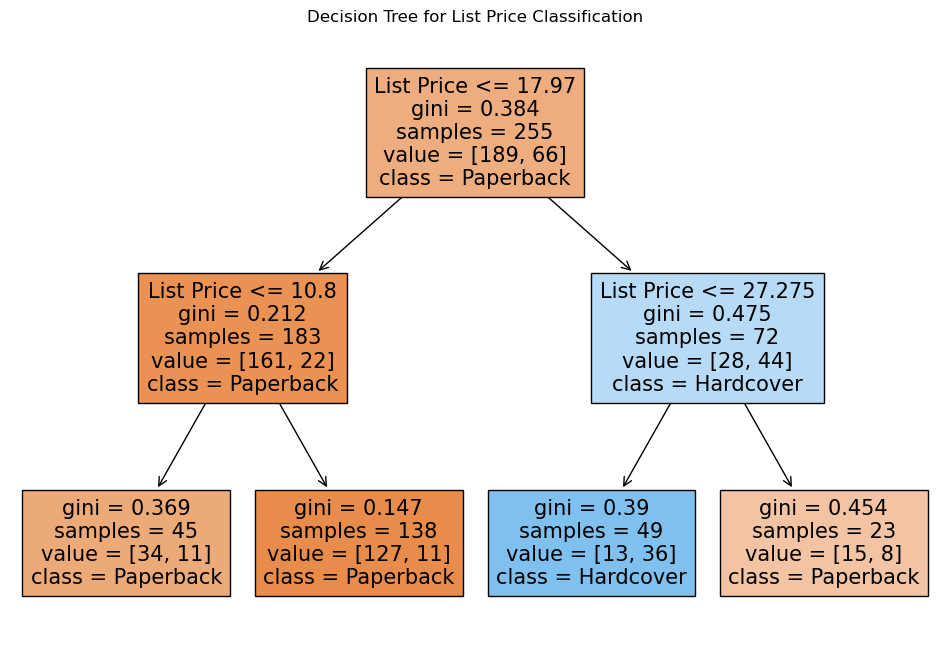

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the classifier with max_depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.title("Decision Tree for List Price Classification")
fig.show(renderer="png")

Explanation of Predictions from tree.plot_tree(clf): The decision tree splits the data based on thresholds of the List Price feature to classify whether a book is a hardcover (H=1) or a paperback (H=0).

Root Node: The first split occurs at a specific List Price. Books priced below this threshold fall into one class (e.g., paperback), while books above it fall into another class.

Leaf Nodes: At depth 2, the tree makes final predictions based on further thresholds. Each leaf node represents a classification (e.g., "Hardcover" or "Paperback").

The tree visualization will clearly show:
- The splitting thresholds.
- The proportion of samples classified as "Hardcover" or "Paperback" at each node.

<details class="details-example"><summary style="color:blue"><u>Continue now...?</u></summary>

### Pre-lecture VS Post-lecture HW

Feel free to work on the "Post-lecture" HW below if you're making good progress and want to continue: for **HW 08** this could be reasonable because, as you'll see, the process of creating and using **classification decision trees** is quite similar to the process for creating and using **multiple linear regression** models. There are differences of course, such as how there is **coefficient hypothesis testing** in **multiple linear regression** and **confusion matrices** in **classification decision trees**, and so on. But you would very likely be able to leverage the silarities to make a lot of progress with **classification decision trees** based on your experience with **multiple linear regression**.
    
*The benefits of continue would are that (a) Consolidate the knowledge already learned and integrate it comprehensively. (b) Let you build experience interacting with ChatBots (and understand their strengths and limitations in this regard)... it's good to have sense of when using a ChatBot is the best way to figure something out, or if another approach (such as course provided resources or a plain old websearch for the right resourse) would be more effective*
    
</details>    

## "Post-lecture" HW [*submission along with "Pre-lecture" HW is due prior to next TUT*]


### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> - _Use the same **train/test split** dataset used so far_
> - _Train the **classification decision tree** `clf2` using **predictor variables** `NumPages`, `Thick` and `List Price`_ 
> - _Again **predict** whether or not a book is hard cover book or a paper back book_
> - _You can visualize your decision tree using the `tree.plot_tree(clf)` function shown in the `sklearn` documentation [here](
https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#what-is-the-values-array-used-here) and [here](https://scikit-learn.org/stable/modules/tree.html); but, to make it more immediately readible it might be better to use `graphviz`, which is demonstrated in the `sklearn` documentation [here](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)_
>
> _If you are interested in how to find the best `max_depth` for a tree, ask ChatBot about "GridSearchCV"_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

NameError: name 'fig' is not defined

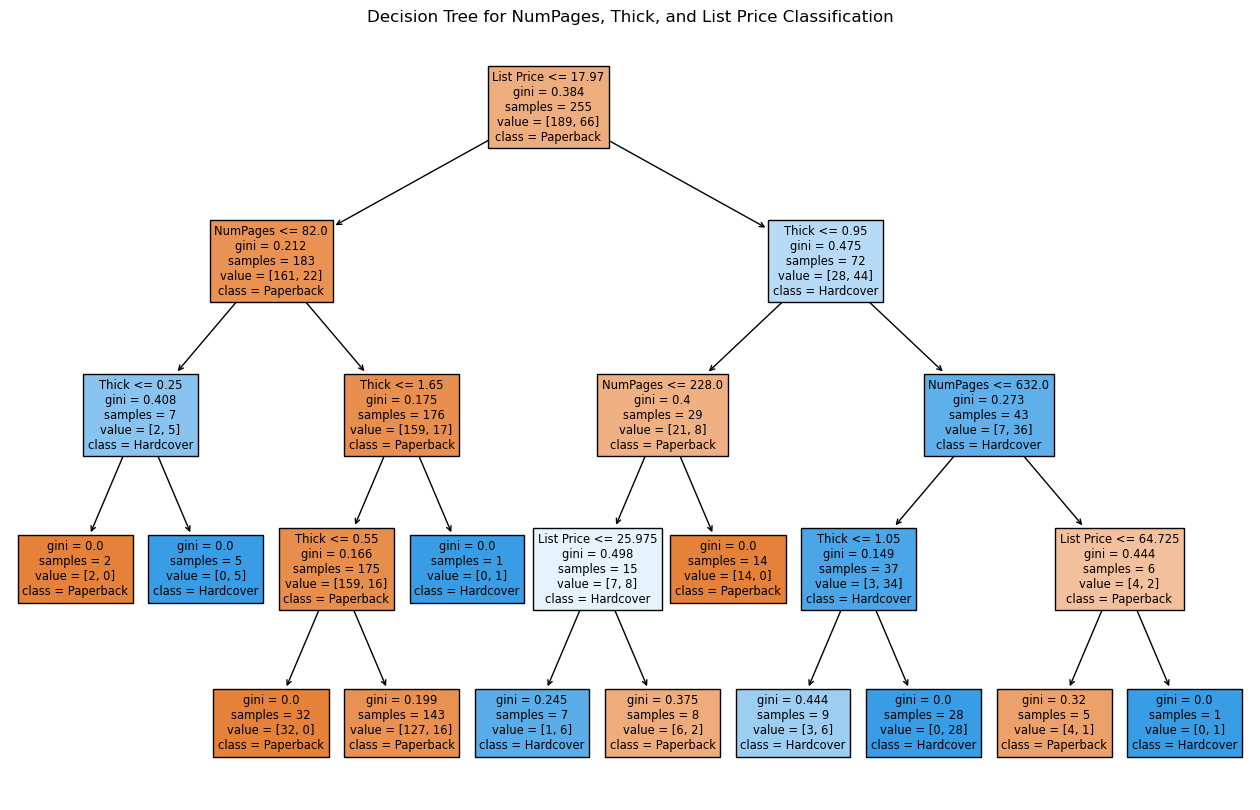

In [23]:
# Define predictors (X) and target variable (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Split the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier with max_depth = 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the classifier to the training data
clf2.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
tree.plot_tree(clf2, feature_names=X.columns, class_names=["Paperback", "Hardcover"], filled=True)
plt.title("Decision Tree for NumPages, Thick, and List Price Classification")
fig.show(renderer="png")

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Hopefully you immediately thought to ask ChatBot to help you with this problem, but if you did you should take time to make sure you're clear about the key components of what the ChatBot is providing for you. You might want to know_
> - _what is a "positive" and what is a "negative"_
> - _how to read an `sklearn` confusion matrix_
> - _what leads to TP, TN, FP, and FN_
> - _whether `y_true` or `y_pred` go first in the `confusion_matrix` function_   
>
> _Have the visualizations you make use decimal numbers with three signifiant digits, such as `0.123` (and not as percentages like `12.3%`), probably based on `np.round()`_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
       
</details>

Metrics for clf (List Price only):
Accuracy: 0.844, Sensitivity: 0.700, Specificity: 0.909

Metrics for clf2 (NumPages, Thick, and List Price):
Accuracy: 0.859, Sensitivity: 0.750, Specificity: 0.909


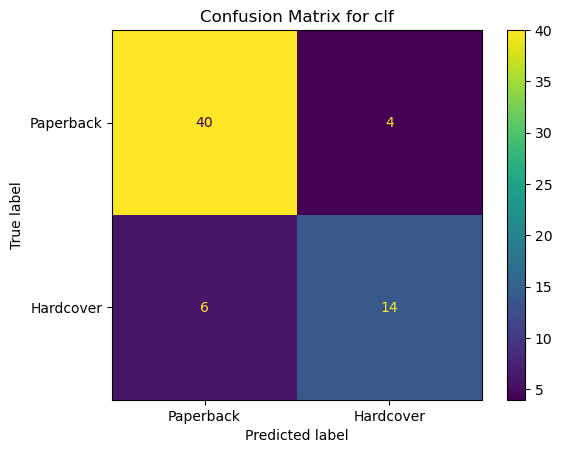

NameError: name 'fig' is not defined

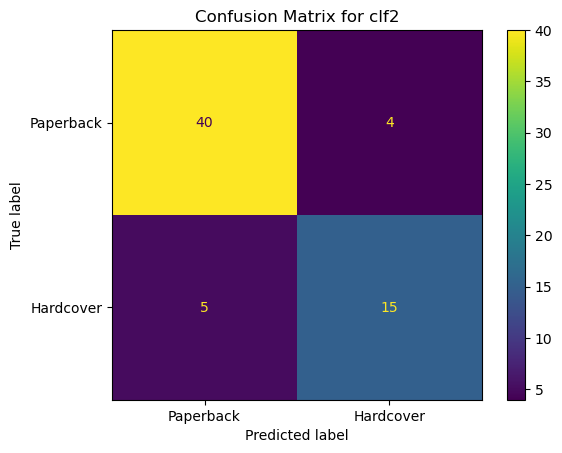

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Step 1: Generate predictions for the test set
y_pred_clf = clf.predict(X_test[['List Price']])
y_pred_clf2 = clf2.predict(X_test)

# Step 2: Create confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 3: Compute metrics
def compute_metrics(cm):
    # Extract values from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    return accuracy, sensitivity, specificity

# Metrics for clf
accuracy_clf, sensitivity_clf, specificity_clf = compute_metrics(cm_clf)

# Metrics for clf2
accuracy_clf2, sensitivity_clf2, specificity_clf2 = compute_metrics(cm_clf2)

# Report metrics
print("Metrics for clf (List Price only):")
print(f"Accuracy: {accuracy_clf:.3f}, Sensitivity: {sensitivity_clf:.3f}, Specificity: {specificity_clf:.3f}")

print("\nMetrics for clf2 (NumPages, Thick, and List Price):")
print(f"Accuracy: {accuracy_clf2:.3f}, Sensitivity: {sensitivity_clf2:.3f}, Specificity: {specificity_clf2:.3f}")

# Step 4: Visualize confusion matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardcover"])
disp_clf.plot()
plt.title("Confusion Matrix for clf")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardcover"])
disp_clf2.plot()
plt.title("Confusion Matrix for clf2")
fig.show(renderer="png")

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```


<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

The differences between the two confusion matrices are due to the features used in the predictions: the first classifier (clf) relies only on List Price, while the second (clf2) uses NumPages, Thick, and List Price, giving it more context to make decisions. By incorporating additional features, clf2 can better capture the relationships that influence whether a book is hardcover or paperback, potentially leading to improved classification accuracy. These differences highlight the limitations of single-variable models like clf, which may oversimplify complex patterns in the data. Overall, the confusion matrices for clf and clf2 on the training set demonstrate how additional predictors can enhance sensitivity, specificity, and accuracy in classification tasks.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>


<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
  
> The way a **classification decision tree** is fit is that at each step in the construction process of adding a new **decision node splitting rule** to the current **tree structure**, all possible **decision rules** for all possible **predictor variables** are considered, and the combination that improves the **prediction** the most (as measured by the criterion of either "Gini impurity" or "Shannon entropy") and in accordance with the rules of the decision tree (such as the `max_depth` argument) is added to the **classification decision tree**.  Thus overall "criterion" noted above improves with each new **decision node splitting rule**, so the improvement can thus be tracked and the improvement contributions attributed to the **feature** upon which the **decision node splitting rule** is based.  This means the relative contribution of each **predictor variable** to the overall explanatory power of the model can be calculated, and this is what the `.feature_importances_` attribute does. 
>
> Compared to the simplicity of understanding how different **covariates** contribute towards the final **predicted values** of **multiple linear regression models** (by just reading off the equation to see how predictions work), the the complexity of how all the different **features** interact and combine to together to create the final **predictions** from **classification decision trees** can be staggering. But the so-called **feature importance** heuristics allows us to judge how relatively important the overall contributions from different features are in the final decision tree predictions. Now we just need to be sure we're not **overfitting** our **classification decision trees** since they can be so **complex**. Fortunately, the "GridSearchCV" methodology mentioned in regards to finding the best `max_depth` setting for a tree is going to provide a general answer to the challenge of complexity and **overfitting** in **machine learning models** that is not too hard to understand (and which you might already have some guesses or a hunch about). 
> 
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
       
</details>

NameError: name 'fig' is not defined

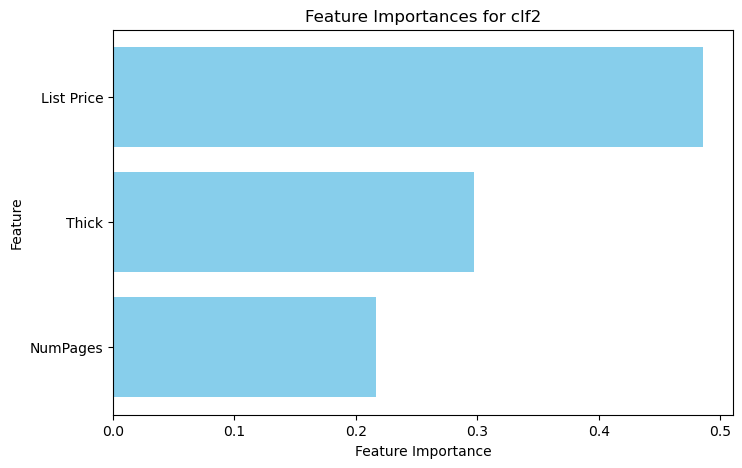

In [25]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Pair feature names with their importances
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for clf2")
plt.gca().invert_yaxis()  # Reverse the order for readability
fig.show(renderer="png")

# Report the most important feature
most_important_feature = importance_df.iloc[0]
most_important_feature

### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

> _Linear model regression predicts continuous real-valued averages for a given configuration of covariate values (or, feature values, if we're using machine learning terminology instead of statistical terminology), whereas a binary classification model such as a binary classification tree predicts 0/1 ("yes" or "no") outcomes (and gives the probability of a 1 "yes" (or "success") outcome from which a 1/0 "yes"/"no" prediction can be made; but, this is not what is being asked here. This question is asking "what's the difference in the way we can interpret and understand how the predictor variables influence the predictions in linear model regression based on the coefficients versus in binary decision trees based on the Feature Importances?"_
>    
> ---
> 
> _Don't forget to ask for summaries of all your different ChatBot sessions and organize and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatBot); but, if you're using the STA130 custom NBLM ChatBot, you'll only be able to ask for summaries, of course!_ 
    
</details>

In linear regression, the coefficients represent the change in the predicted outcome for a one-unit change in the predictor variable, assuming all other variables remain constant. These coefficients are linear and direct, indicating the strength and direction of the relationship between the predictor and the target variable. Decision trees represent the relative contribution of each feature to reducing impurity in the tree, reflecting how much a feature helps in making decisions at different splits, making it more context-dependent.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>
  
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>

>  _Here is the link of [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) in case it gets lost among all the information you need to keep track of_  : )
> 
> _Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)_
    
</details>

Sometimes I would go take a look at it yeah, but the material is honestly still quite confusing overall for me.

# Recommended Additional Useful Activities [Optional]

The "Ethical Profesionalism Considerations" and "Current Course Project Capability Level" sections below **are not a part of the required homework assignment**; rather, they are regular weekly guides covering (a) relevant considerations regarding professional and ethical conduct, and (b) the analysis steps for the STA130 course project that are feasible at the current stage of the course 

<br>
<details class="details-example"><summary style="color:blue"><u>Ethical Professionalism Considerations</u></summary>

### Ethical Professionalism Considerations

- Discuss with a ChatBox about consent and data collection for training models.
    - Discuss the ethics of data collection for training decision trees, particularly the need for informed consent when personal data is involved.
    - Evaluate the role of regulatory frameworks in ensuring ethical data collection practices.
- Discuss with a ChatBox about accountability in automated decision-making.
    - Address the challenges of holding systems and their developers accountable when decision trees lead to adverse outcomes.
    - Explore legal and ethical frameworks for responsibility when automated decisions go wrong.
- Discuss with a ChatBox about transparency and explainability in classification models.
    - Discuss the importance of model transparency, particularly when using decision trees in sectors like healthcare or criminal justice.
    - Explore methods to enhance the explainability of decision trees, such as visualization techniques and simplified decision paths.
- Discuss with a ChatBox about impact of misclassifications in critical applications.
    - Examine the consequences of false positives and false negatives in decision tree outcomes, using confusion matrices to highlight these issues.
    - Discuss ethical responsibilities when deploying classifiers in high-stakes fields like medicine or law enforcement.
    
</details>    

<details class="details-example"><summary style="color:blue"><u>Current Course Project Capability Level</u></summary>

**Remember to abide by the [data use agreement](https://static1.squarespace.com/static/60283c2e174c122f8ebe0f39/t/6239c284d610f76fed5a2e69/1647952517436/Data+Use+Agreement+for+the+Canadian+Social+Connection+Survey.pdf) at all times.**

Information about the course project is available on the course github repo [here](https://github.com/pointOfive/stat130chat130/tree/main/CP), including a draft [course project specfication](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F23_course_project_specification.ipynb) (subject to change). 
- The Week 01 HW introduced [STA130F24_CourseProject.ipynb](https://github.com/pointOfive/stat130chat130/blob/main/CP/STA130F24_CourseProject.ipynb), and the [available variables](https://drive.google.com/file/d/1ISVymGn-WR1lcRs4psIym2N3or5onNBi/view). 
- Please do not download the [data](https://drive.google.com/file/d/1mbUQlMTrNYA7Ly5eImVRBn16Ehy9Lggo/view) accessible at the bottom of the [CSCS](https://casch.org/cscs) webpage (or the course github repo) multiple times.
    

> ### NEW DEVELOPMENT<br>New Abilities Achieved and New Levels Unlocked!!!    
> 
> And with that, ALL LEVELS unlocked! 
>
> CONGRATS, YOU LEGENDS! 🎉
>
> You’ve battled through the wild jungles of deadlines, defeated the mighty Homework Beasts, and climbed the towering Mount Procrastination. And guess what? YOU MADE IT TO THE TOP! 🏔️
> 
> Take a bow, grab a treat, and enjoy the sweet, sweet taste of freedom(**just for now , because you still have to finish the project! But you are almost done!**). You’ve earned it. Now go out there and celebrate like the absolute rockstars you are! 🌟💪
>

    
### Current Course Project Capability Level    
    
I mean, the **course project** is basically, like, essentially now.
    
- Will you be doing any **classification decision trees** stuff for the course project?
    - You could consider making some [partial dependency plots](https://scikit-learn.org/stable/modules/partial_dependence.html) if so...
    - those might provide an interesting analysis in addition to **tree structure** visualizations, **confusion matrices**, **feature importances**. and the standard "in-sample versus out-of-sample" **train-test validation** analysis that would be expected in a **machine learning context**
    
- You could see if there are any interesting columns that might make for a potentially interesting **classification decision tree** analysis
    - You wouldn't have to though...
    - But if you did you'd want to be able to articulate and explain why what you're doing with **classification decision trees** is appropriate and enlightening

- Anyway, I guess that just leaves reviewing all the statistical techniques covered in STA130, and considering integrating them holistically into your project!
    
</details>        